# Analyze after each EXP

## 1. rating distribution, basic info, axis distribution, etc

mean: 0.5638
max: 0.9632
min: 0.0022
std: 0.3639
count: 100
[0.9497255, 0.85062385, 0.8822981, 0.50300366, 0.41042423, 0.1304411, 0.89036983, 0.11611838, 0.9306228, 0.420095, 0.03306624, 0.93657625, 0.0597919, 0.9342558, 0.39912888, 0.47125798, 0.21927488, 0.25246724, 0.49905112, 0.21284862, 0.21567483, 0.953483, 0.91797733, 0.903905, 0.0021569715, 0.8579319, 0.9449415, 0.94527847, 0.1562731, 0.21428916, 0.64747494, 0.8697944, 0.09725925, 0.86088824, 0.29344878, 0.14443484, 0.944924, 0.18512028, 0.053536143, 0.9423392, 0.008657554, 0.314917, 0.9231746, 0.94813144, 0.1791142, 0.9481822, 0.95667714, 0.9353963, 0.8229777, 0.84406394, 0.19971986, 0.9184181, 0.39417967, 0.3537479, 0.96068114, 0.7549656, 0.66936994, 0.117158614, 0.11551738, 0.9529752, 0.9589976, 0.19433238, 0.9443553, 0.90526915, 0.9631644, 0.17903168, 0.94846696, 0.45344046, 0.95442194, 0.5959694, 0.9357085, 0.84960216, 0.9294324, 0.9357451, 0.30314344, 0.16699414, 0.05542322, 0.9170051, 0.06936381, 0.61061305, 0.33022416, 

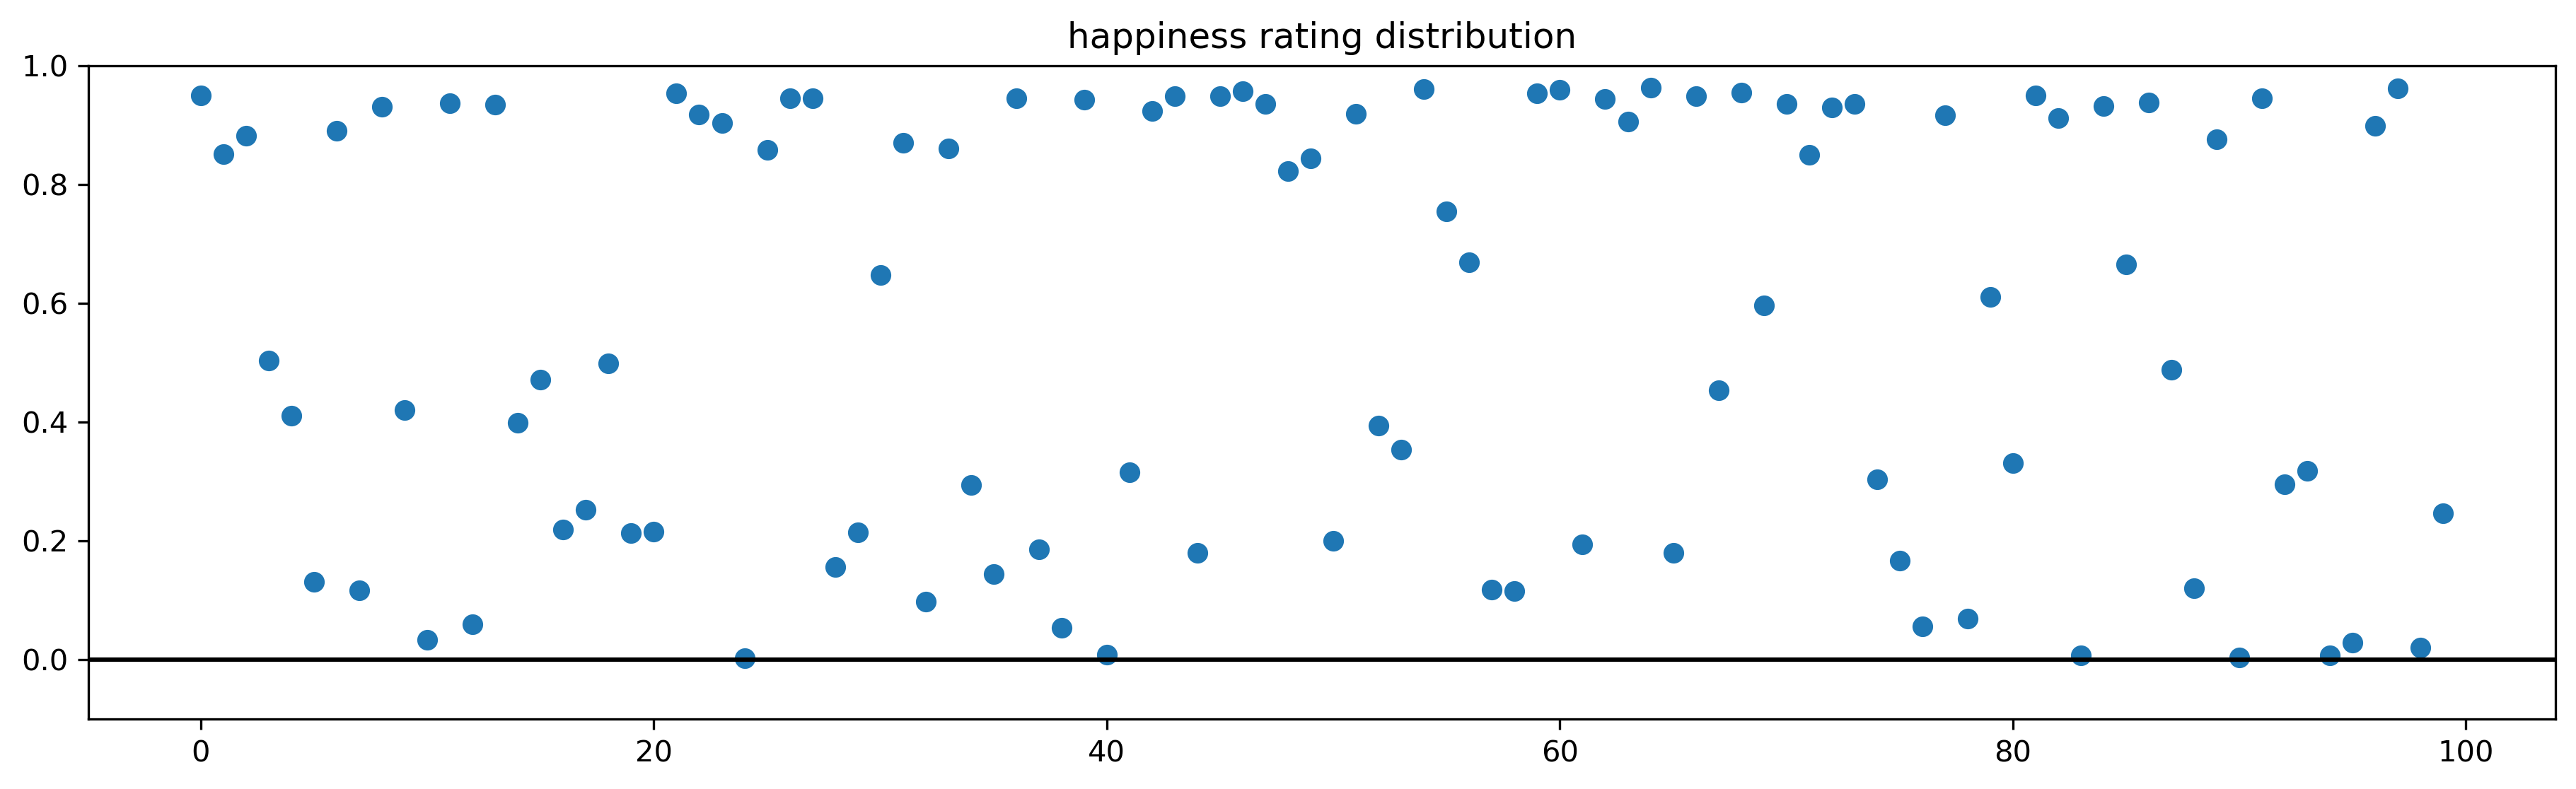

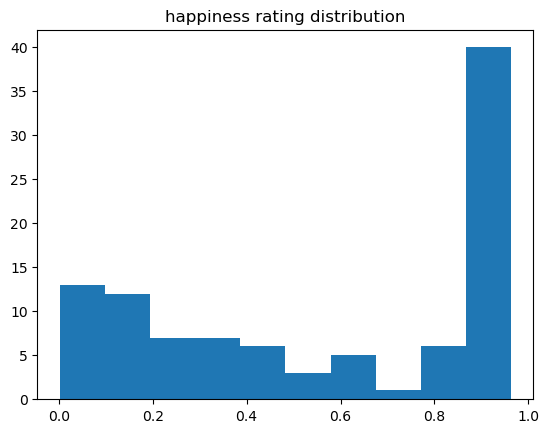

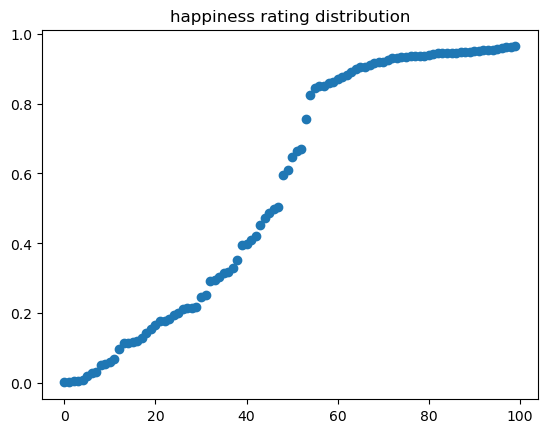

In [115]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_rmn_emotion.csv'
        # csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp[target_emo]))
    
    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))
    print(res)

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.figure(figsize=(15, 4), dpi=300)
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res
    


target_emo = 'happiness'
fold_name = f'image_analysis/{target_emo}/'
# fold_name = f'image_analysis/241121Exp27-1IntensityOnly/{target_emo}/'
# fold_name = f'image_analysis/241121Exp27Baseline/{target_emo}/'
res = get_rating_dist(fold_name, target_emo)

In [116]:
import math

def top_30_percent_cutoff(values):
    sorted_values = sorted(values, reverse=True)  # Step 1
    print(sorted_values)
    cutoff_index = math.ceil(len(sorted_values) * 0.3) - 1  # Step 2
    print(cutoff_index)
    return sorted_values[cutoff_index]  # Step 3

# Example usage
cutoff_point = top_30_percent_cutoff(res)
print("Top 30% cutoff point:", cutoff_point)

[0.9631644, 0.96140605, 0.96068114, 0.9589976, 0.95667714, 0.95442194, 0.953483, 0.9529752, 0.94979817, 0.9497255, 0.94846696, 0.9481822, 0.94813144, 0.94527847, 0.9452333, 0.9449415, 0.944924, 0.9443553, 0.9423392, 0.9378453, 0.93657625, 0.9357451, 0.9357085, 0.9353963, 0.9342558, 0.9320467, 0.9306228, 0.9294324, 0.9231746, 0.9184181, 0.91797733, 0.9170051, 0.9114268, 0.90526915, 0.903905, 0.89824015, 0.89036983, 0.8822981, 0.8757729, 0.8697944, 0.86088824, 0.8579319, 0.85062385, 0.84960216, 0.84406394, 0.8229777, 0.7549656, 0.66936994, 0.664742, 0.64747494, 0.61061305, 0.5959694, 0.50300366, 0.49905112, 0.4874724, 0.47125798, 0.45344046, 0.420095, 0.41042423, 0.39912888, 0.39417967, 0.3537479, 0.33022416, 0.31714568, 0.314917, 0.30314344, 0.2946882, 0.29344878, 0.25246724, 0.24637449, 0.21927488, 0.21567483, 0.21428916, 0.21284862, 0.19971986, 0.19433238, 0.18512028, 0.1791142, 0.17903168, 0.16699414, 0.1562731, 0.14443484, 0.1304411, 0.119724646, 0.117158614, 0.11611838, 0.11551738,

In [113]:
0.3933 * 0.8

0.31464000000000003

['2024_11_21_20_57_28_sadness_1.png', '2024_11_21_20_57_31_sadness_2.png', '2024_11_21_20_57_33_sadness_3.png', '2024_11_21_20_57_35_sadness_4.png', '2024_11_21_20_57_38_sadness_5.png', '2024_11_21_20_57_40_sadness_6.png', '2024_11_21_20_57_42_sadness_7.png', '2024_11_21_20_57_45_sadness_8.png', '2024_11_21_20_57_47_sadness_9.png', '2024_11_21_20_57_49_sadness_10.png']
mean: 0.2225
max: 0.9647
min: 0.0005
std: 0.2959
count: 100


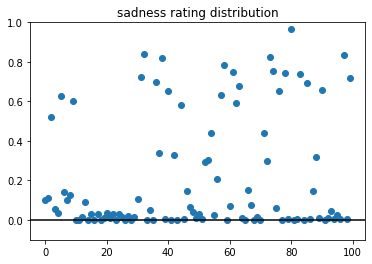

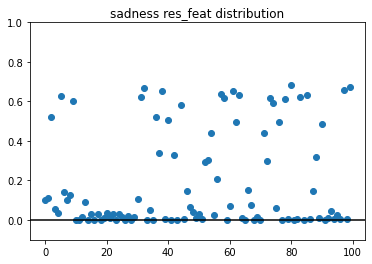

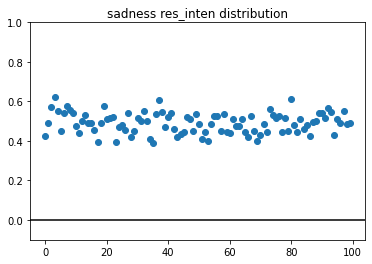

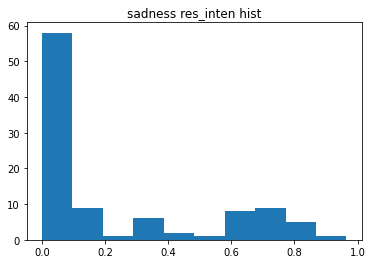

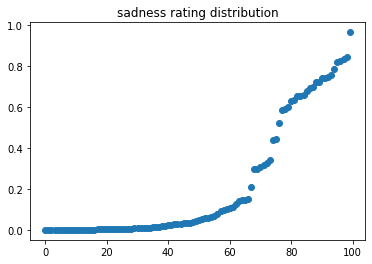

In [33]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(fold_name) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('.png')[0].split('_')[-1]))
    print(images[:10])
    res = []
    res_feat = []
    res_inten = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
        res_feat.append(float(tmp['feat']))
        res_inten.append(float(tmp['inten']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.1, 1.)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res_feat)), res_feat)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_feat distribution')
    plt.show()
    
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res_inten)), res_inten)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_inten distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' res_inten hist')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res, res_feat, res_inten

target_emo = 'sadness'
fold_name = f'image_analysis/{target_emo}'
res, res_feat, res_inten = get_rating_dist(fold_name, target_emo)


In [34]:
print(sorted(res))
print(len(res))

[0.00046610736, 0.00047947044, 0.0005334139, 0.0007768616, 0.00080493727, 0.0009270215, 0.00097200176, 0.001187041, 0.0012523539, 0.0012736164, 0.0014162766, 0.0014163699, 0.0016149817, 0.0018164527, 0.0022195126, 0.0024047475, 0.0024700451, 0.0025154662, 0.0026831976, 0.0026915031, 0.003081076, 0.0031905852, 0.0042045205, 0.0042721126, 0.004489233, 0.004543598, 0.004744376, 0.0055418573, 0.0061949175, 0.008218289, 0.009432469, 0.011455436, 0.011763137, 0.011773105, 0.012182371, 0.015111074, 0.016507188, 0.016649064, 0.017623866, 0.021411918, 0.024635794, 0.025434146, 0.028337134, 0.030096628, 0.030382952, 0.032114565, 0.03219514, 0.035613634, 0.036754955, 0.041739367, 0.047245335, 0.051654167, 0.05667432, 0.058804262, 0.06395765, 0.070208915, 0.07813053, 0.09233383, 0.10004141, 0.10126771, 0.10594597, 0.11012399, 0.12548296, 0.14309801, 0.14676045, 0.14684409, 0.15202755, 0.20920414, 0.29576063, 0.29637206, 0.30575597, 0.31953013, 0.3285556, 0.33961987, 0.44019946, 0.44170237, 0.52057

In [35]:
print(sorted(res_feat))
print(len(res_feat))

[0.00046610736, 0.00047947044, 0.0005334139, 0.0007768616, 0.00080493727, 0.0009270215, 0.00097200176, 0.001187041, 0.0012523539, 0.0012736164, 0.0014162766, 0.0014163699, 0.0016149817, 0.0018164527, 0.0022195126, 0.0024047475, 0.0024700451, 0.0025154662, 0.0026831976, 0.0026915031, 0.003081076, 0.0031905852, 0.0042045205, 0.0042721126, 0.004489233, 0.004543598, 0.004744376, 0.0055418573, 0.0061949175, 0.008218289, 0.009432469, 0.011455436, 0.011763137, 0.011773105, 0.012182371, 0.015111074, 0.016507188, 0.016649064, 0.017623866, 0.021411918, 0.024635794, 0.025434146, 0.028337134, 0.030096628, 0.030382952, 0.032114565, 0.03219514, 0.035613634, 0.036754955, 0.041739367, 0.047245335, 0.051654167, 0.05667432, 0.058804262, 0.06395765, 0.070208915, 0.07813053, 0.09233383, 0.10004141, 0.10126771, 0.10594597, 0.11012399, 0.12548296, 0.14309801, 0.14676045, 0.14684409, 0.15202755, 0.20920414, 0.29576063, 0.29637206, 0.30575597, 0.31953013, 0.3285556, 0.33961987, 0.44019946, 0.44170237, 0.48696

In [94]:
# import matplotlib.pyplot as plt

# # Test data
# A_values = np.linspace(0.5, 1.0, 100)  # Simulating A in range
# B_values = np.linspace(0.4, 0.65, 100)  # Simulating B in range


# def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
#     # Clamp B within its defined range
#     B = max(B_min, min(B, B_max))
    
#     # Scale B to the desired output range [output_min, output_max]
#     B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    
#     # Apply sigmoid-based weight for smooth transition
#     weight = 1 / (1 + np.exp(-k * (A - threshold)))
    
#     # Ensure continuity: blend A and scaled B_mapped smoothly
#     if A <= threshold:
#         # Below threshold, use A directly
#         output = A
#     else:
#         # Above threshold, calculate the smooth nonlinear mixed output
#         output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
#     return output

# # Calculate outputs
# outputs = [calculate_output_nonlinear(A, B) for A, B in zip(A_values, B_values)]

# # Plot
# plt.plot(A_values, outputs, label="Nonlinear Mixed Output")
# plt.xlabel("A (Primary Score)")
# plt.ylabel("Mixed Output")
# plt.title("Smooth Nonlinear Mixing")
# plt.legend()
# plt.grid()
# plt.show()

## 2 axis distribution

(100, 15)      rating      feat     inten          x1         x10         x11  \
0  0.002692  0.002692  0.396892   90.031915   44.234199  208.767262   
1  0.001274  0.001274  0.448772   44.672961  135.778075   61.907819   
2  0.030097  0.030097  0.393095   27.891422  218.602838  211.422480   
3  0.440199  0.440199  0.483541  205.259498  224.441309  175.648778   
4  0.004205  0.004205  0.452665   91.799596  161.102999   21.251913   

          x16         x18         x20         x28         x29         x30  \
0  103.947654 -119.349623  172.401287  215.504834   89.133925    7.867526   
1   32.202912   42.667010  183.814610  182.624229  242.507607  180.621340   
2  114.767480 -249.794353   22.925456   76.745862  167.756908  242.486282   
3   60.102380  -22.608615   49.356284   20.243098  126.660513   51.714814   
4  250.376771  -16.892455   12.153149  200.113053   64.143419    6.379759   

         x32          x6          x8  
0  56.795135    6.092291 -202.801628  
1  98.861829   88.9490

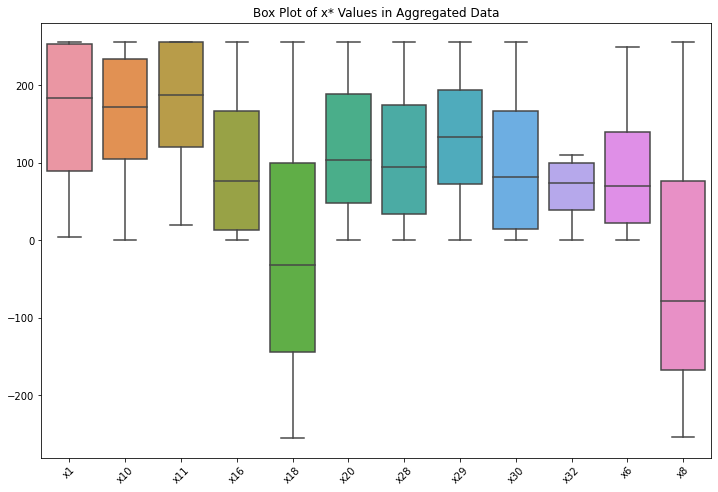

In [36]:
# axis distribution

def get_axis_dist_figure(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    aggregated_data = pd.DataFrame()
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        aggregated_data = pd.concat([aggregated_data, tmp], ignore_index=True)

    # Verify the aggregation by checking the shape and first few rows
    print(aggregated_data.shape, aggregated_data.head())

    # draw the box plot with scatter plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=aggregated_data.drop(columns=['rating', 'feat', 'inten']))
#     sns.swarmplot(data=aggregated_data.drop(columns='rating'), color='green')blue
    plt.xticks(rotation=45)
    plt.title("Box Plot of x* Values in Aggregated Data")
    plt.show()

get_axis_dist_figure(fold_name, target_emo)

## 2. different rating distributions

In [ ]:
# 

## 3. visualize figures by ratings order

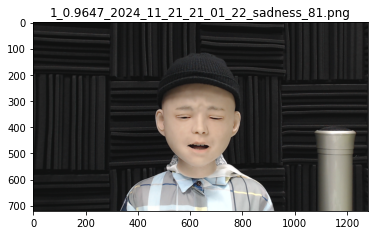

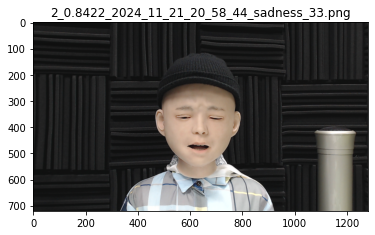

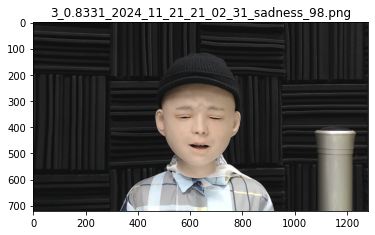

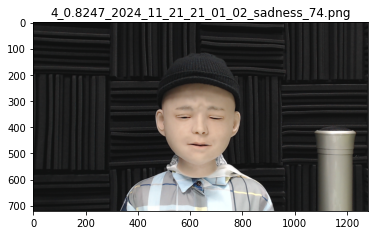

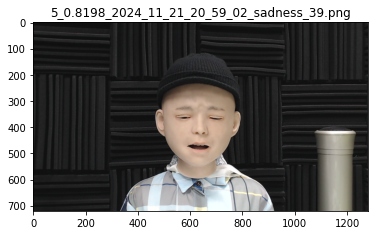

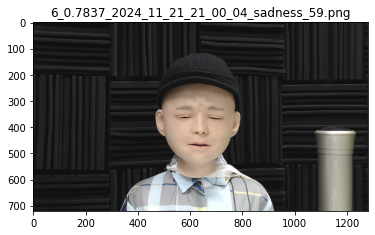

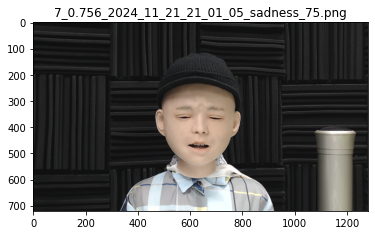

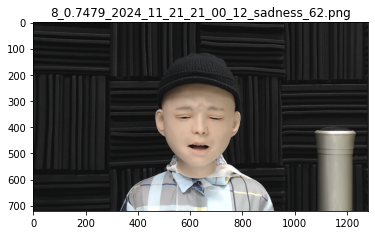

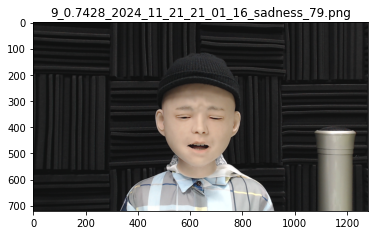

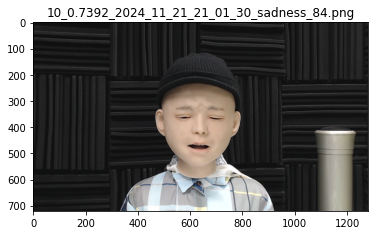

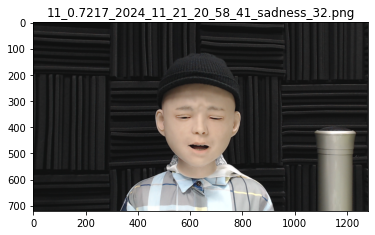

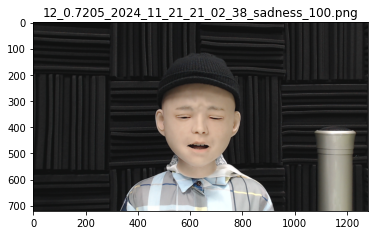

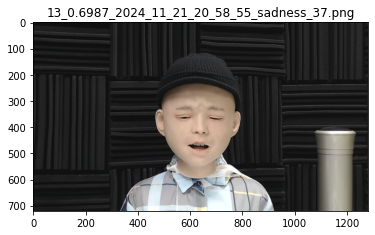

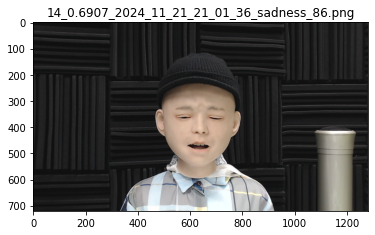

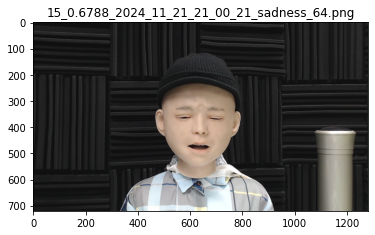

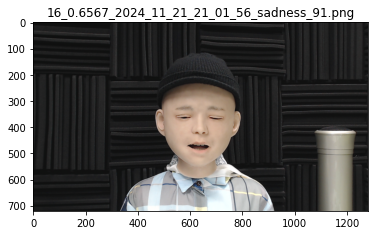

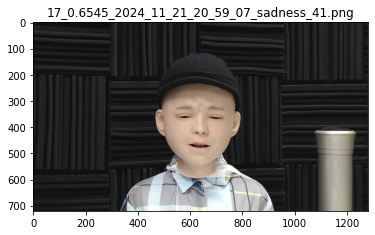

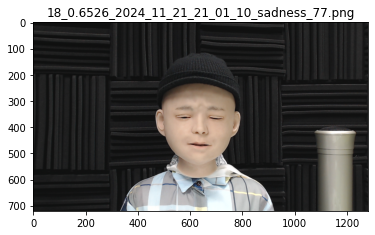

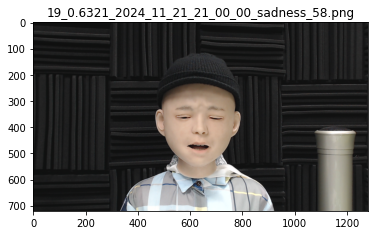

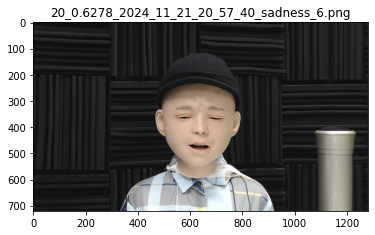

In [37]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, 'top_images')):
            os.makedirs(os.path.join(fold_name, 'top_images'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, test[i][0]), os.path.join(fold_name, 'top_images', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, 'top_images')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, 'top_images', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 20)
show_images_in_subfolder(fold_name, target_emo)

## 4. Analyze the ratings for human judged probe images and the top ratings

In [11]:
print(fold_name)

image_analysis/anger


In [14]:

filename_order_pairs = get_png_rating_pairs(fold_name, target_emo)
filename_order_pairs = sorted(filename_order_pairs, key=lambda x:int(x[0].split('.png')[0].split('_')[-1]))
# filename_order_pairs.reverse()
print(filename_order_pairs)

# probe should be the first ** files



[('2024_11_21_10_22_01_anger_1.png', 0.0024908308), ('2024_11_21_10_22_05_anger_2.png', 0.0013266978), ('2024_11_21_10_22_08_anger_3.png', 0.08295883), ('2024_11_21_10_22_11_anger_4.png', 0.08535274), ('2024_11_21_10_22_14_anger_5.png', 0.0027993268), ('2024_11_21_10_22_17_anger_6.png', 0.018634763), ('2024_11_21_10_22_21_anger_7.png', 0.012612821), ('2024_11_21_10_22_24_anger_8.png', 0.15443212), ('2024_11_21_10_22_27_anger_9.png', 0.012157859), ('2024_11_21_10_22_30_anger_10.png', 0.61066526), ('2024_11_21_10_22_34_anger_11.png', 0.18266271), ('2024_11_21_10_22_37_anger_12.png', 0.16978692), ('2024_11_21_10_22_40_anger_13.png', 0.28506508), ('2024_11_21_10_22_43_anger_14.png', 0.215658), ('2024_11_21_10_22_47_anger_15.png', 0.32172003), ('2024_11_21_10_22_50_anger_16.png', 0.47901842), ('2024_11_21_10_22_53_anger_17.png', 0.22535469), ('2024_11_21_10_22_56_anger_18.png', 0.13944066), ('2024_11_21_10_23_00_anger_19.png', 0.49344957), ('2024_11_21_10_23_04_anger_20.png', 0.002294534), 

In [31]:
filename_order_pairs

[('2024_11_13_15_40_45_disgust_2.png', 0.039546266),
 ('2024_11_13_15_40_42_disgust_1.png', 0.37437734),
 ('2024_11_13_15_40_38_disgust_0.png', 0.00026482125)]

## 5. Visualize the intensitynet order

mean: 0.4897
max: 0.6511
min: 0.3149
std: 0.0609
count: 300


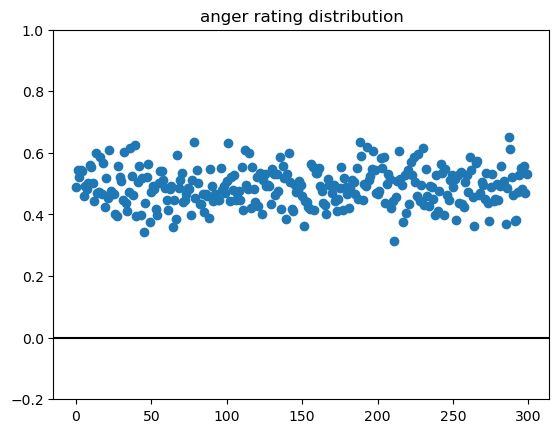

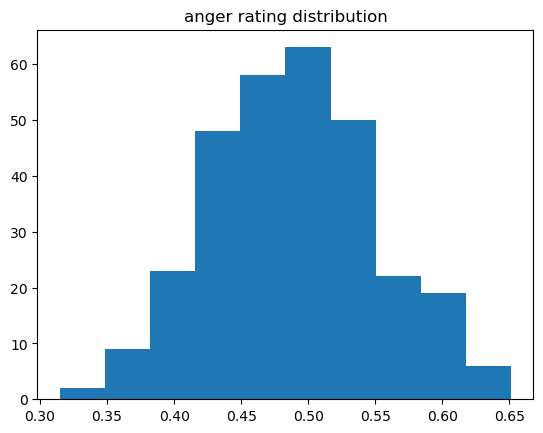

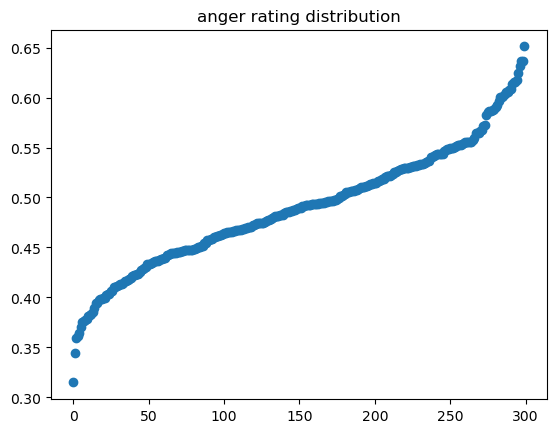

In [20]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.2, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    

fold_name = 'image_analysis/241114Exp25/new_baseline'
target_emo = 'anger'
get_rating_dist(fold_name, target_emo)

## 6. visualize figures by ratings order

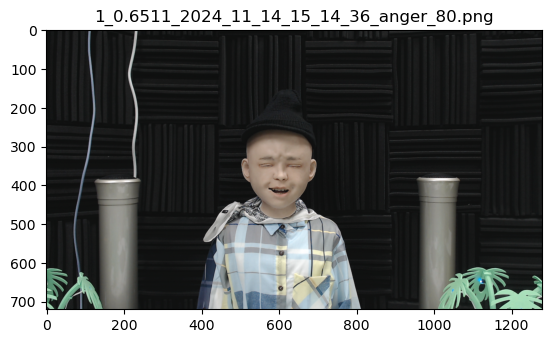

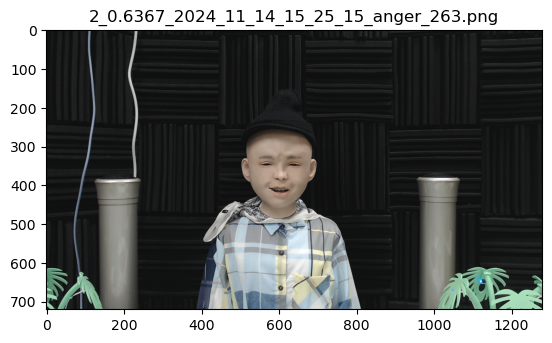

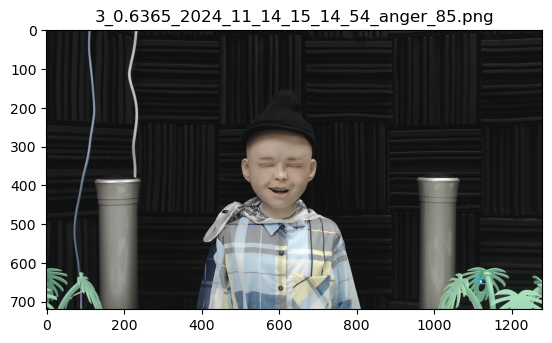

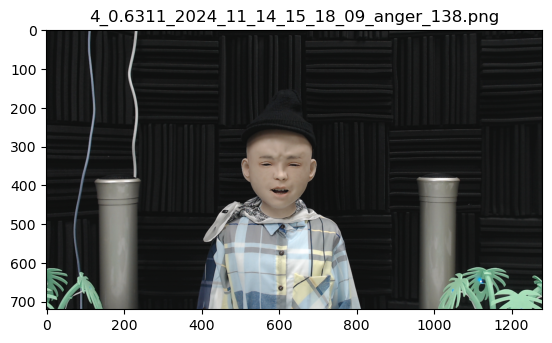

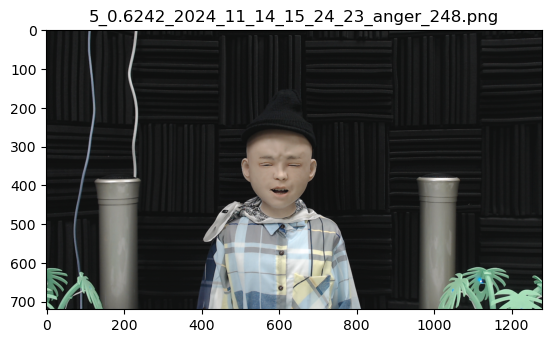

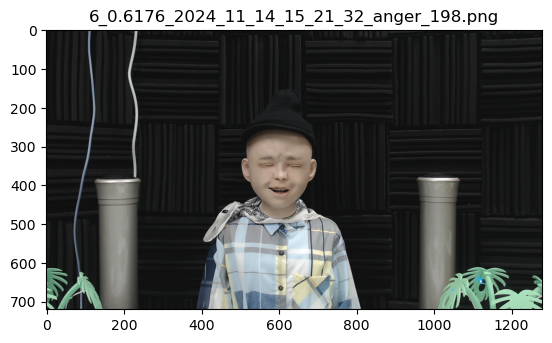

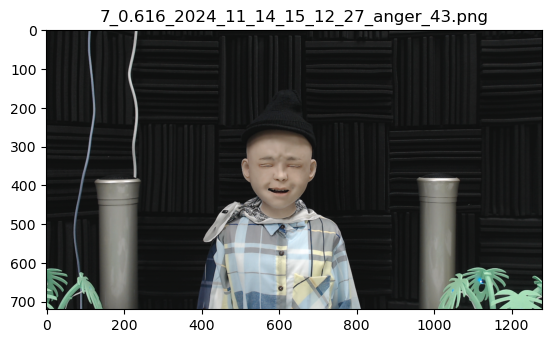

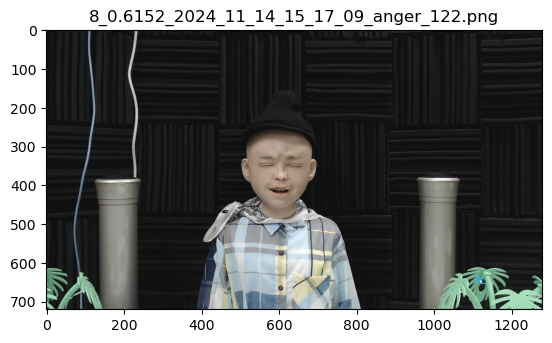

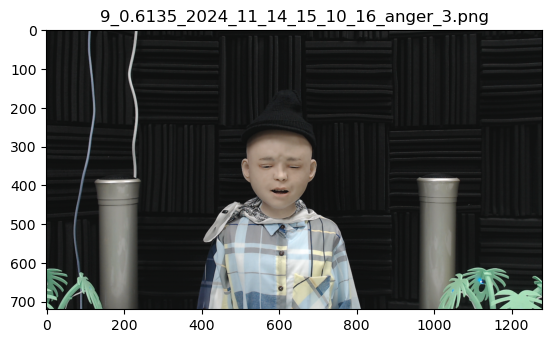

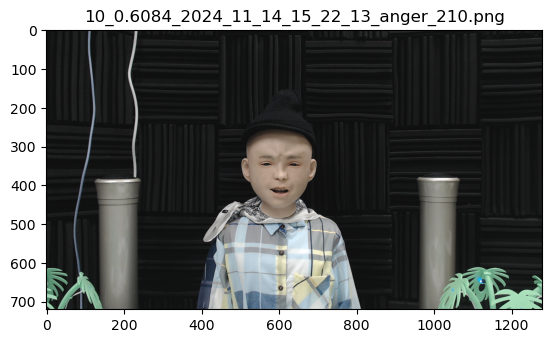

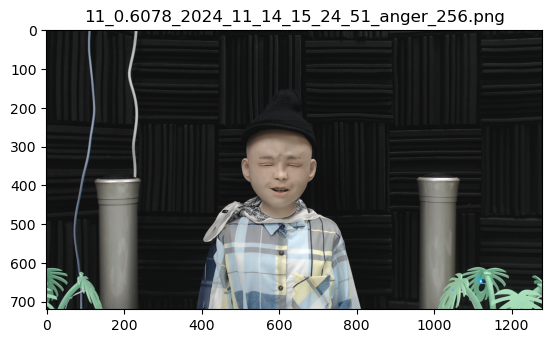

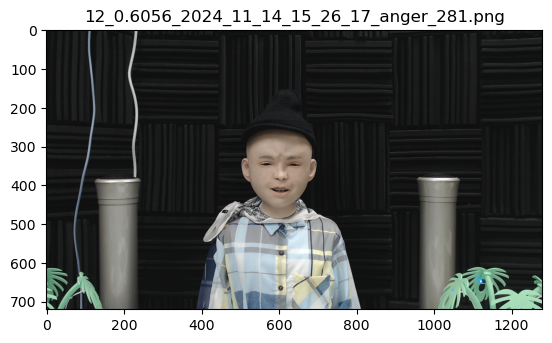

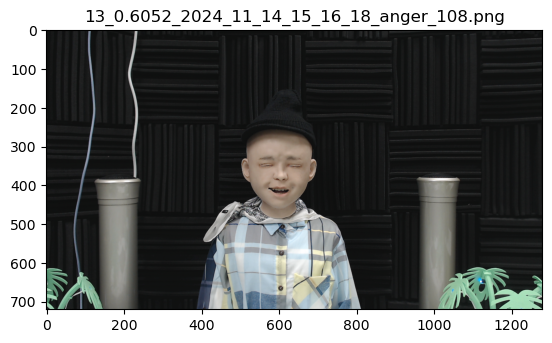

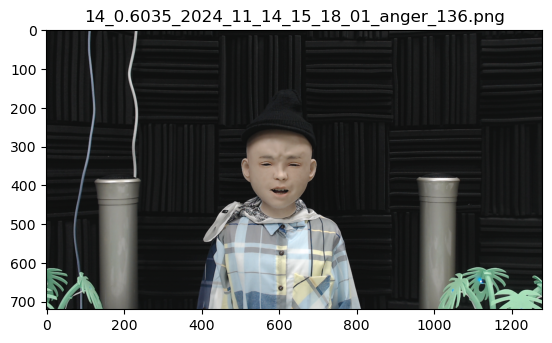

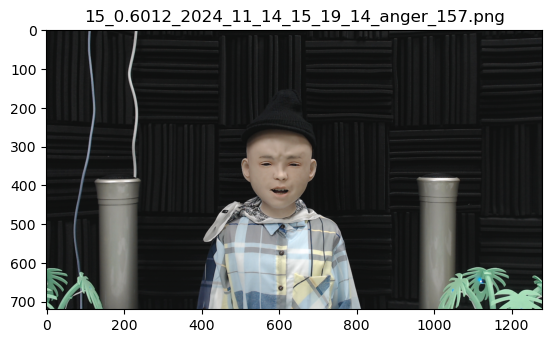

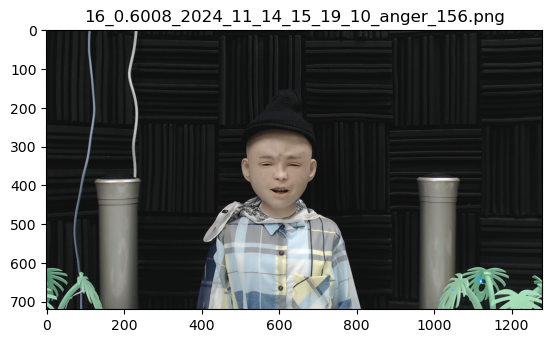

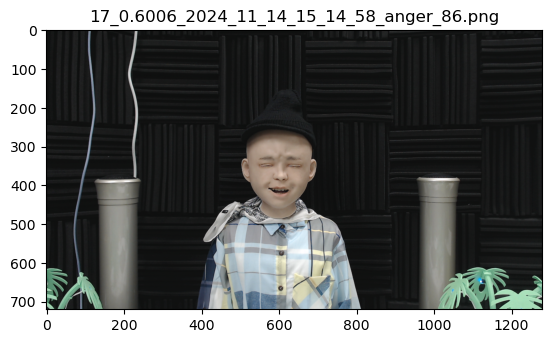

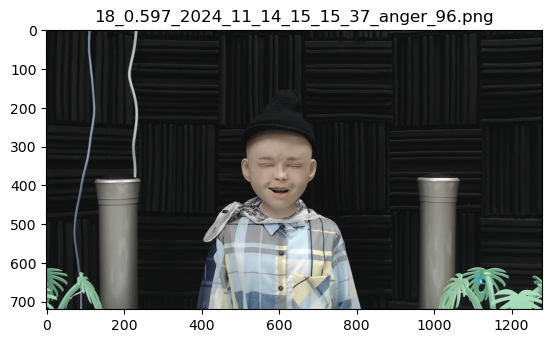

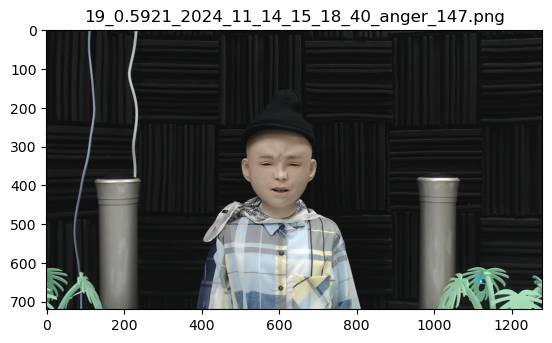

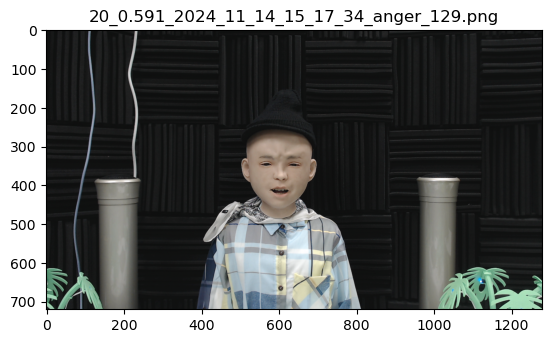

In [24]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, target_emo, 'top_images_inten')):
            os.makedirs(os.path.join(fold_name, target_emo, 'top_images_inten'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, target_emo, test[i][0]), os.path.join(fold_name, target_emo, 'top_images_inten', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo, 'top_images_inten')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, target_emo, 'top_images_inten', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 20)
show_images_in_subfolder(fold_name, target_emo)

In [12]:
# load log and analyze
import pandas as pd
import json

# Load the JSON file
data = pd.read_json('image_analysis/anger/baye_logs.json', lines=True)

# Display the first few rows
print(data.head())

negative_indices = data[data['target'] < 0].index.tolist()
negative_indices


     target                                             params  \
0  0.013234  {'x1': 141.4699283283842, 'x10': 1.61147456520...   
1  0.005860  {'x1': 95.64701226922041, 'x10': 151.401416119...   
2  0.046329  {'x1': 88.7744608756346, 'x10': 62.25044060576...   
3  0.022448  {'x1': 245.16173295051672, 'x10': 95.559653090...   
4  0.016686  {'x1': 50.75987051091533, 'x10': 18.5608121146...   

                                            datetime  
0  {'datetime': '2024-11-16 20:53:12', 'elapsed':...  
1  {'datetime': '2024-11-16 20:53:15', 'elapsed':...  
2  {'datetime': '2024-11-16 20:53:18', 'elapsed':...  
3  {'datetime': '2024-11-16 20:53:21', 'elapsed':...  
4  {'datetime': '2024-11-16 20:53:24', 'elapsed':...  


[34, 46]

In [29]:
import numpy as np
def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # If A is below or equal to the threshold, output A directly
    if A <= threshold:
        return A
    
    # Scale B to fit within the desired range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    print(B_mapped)
    
    # Apply a sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))  # Sigmoid function for smoother blending
    
    # Calculate the smooth nonlinear mixed output
    output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
    return output

output_feat = 0.15581991
output_inten = 0.0663062584400177
threshold = 0.1

B_max= 0.1813
B_min= 0.0966

output = calculate_output_nonlinear(output_feat, output_inten, threshold=threshold, alpha=0.8, B_min=B_min, B_max=B_max, output_min=threshold, output_max=1.1, k=10)
print(output)

-0.2576592864224595
-0.05457012881275982


In [ ]:
[470.30353, 235.7863, 690.0836, 532.0844, 0.99978167]